<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-karelcuevas/blob/main/Equipo65_reto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
CIENCIA Y ANALÍTICA DE DATOS

Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans



**Nombres y matrículas de los integrantes del equipo:**

* Héctor Manuel González Villarreal-A00178679
*   Karel Alejandro Cuevas Hernández-A00301492




En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Cargamos los datos del archivo previamente guardado en el ambiente Colab local en la carpeta /content/

import pandas as pd

URL1 = '/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df = pd.read_csv(URL1, sep=',', encoding = 'latin1')
df_aguasub = df.copy()
df_aguasub

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [4]:
# Cargamos el diccionario de datos previamente guardado en el ambiente Colab local en la carpeta /content/
# Nos damos cuenta que la columna "SEMAFORO" indica el nivel de contaminación del agua de acuerdo a los contaminantes, por lo tanto la tomaremos como referencia en lo subsecuente 

URL2 = '/content/Diccionario_datos_Subterrenal.csv'
df2 = pd.read_csv(URL2, sep=',', encoding = 'latin1')
df2

,ï»¿CAMPO,DESCRIPCION,TIPO,VALOR_POSIBLE
0,CLAVE,Clave del sitio de monitoreo,Texto,A - Z
1,SITIO,Nombre del sitio de muestreo,Texto,A - Z
2,ID_ORGANISMO_DE_CUENCA,Identificador de Organismo de Cuenca,Numerico,Entero
3,NOMBRE_ORGANISMO_DE_CUENCA,Nombre del Organismo de Cuenca de agua donde s...,Texto,A - Z
4,ID_ESTADO,Identificador de Estado,Numerico,Entero
...,...,...,...,...
57,CUMPLE_CON_SDT_ra,Indica si cumple con la calidad de Excelente p...,Texto,"SI, NO, ND"
58,CUMPLE_CON_SDT_salin,Indica si cumple con la calidad de Potable - D...,Texto,"SI, NO, ND"
59,CONTAMINANTES,Contaminantes presentes en incumplimiento (Co...,Texto,"ALC, CONDUC, SDT_ra,SDT_salin, FLUO, DT, AS,NO..."
60,SEMAFORO,Indica el nivel de contaminacion de acuerdo a ...,Texto,"Verde, Amarillo, Rojo"


In [5]:
#Comenzamos el análisis de datos

df_aguasub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [6]:
#revisemos datos nulos
df_aguasub.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

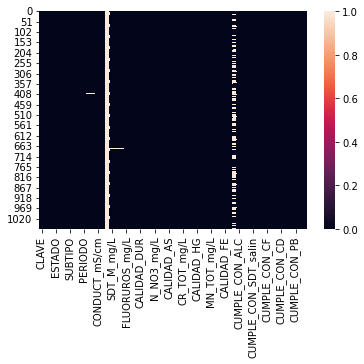

In [7]:
# Identificamos valores faltantes visualmente

import seaborn as sns

sns.heatmap(df_aguasub.isnull(), cbar=True)

In [8]:
df_aguasub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64


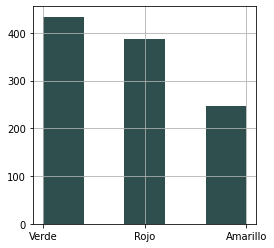

In [9]:
#Analizamos la distribución de información de "SEMAFORO", considerando que se trata del valor que indica el nivel de contaminentes del agua

y = pd.DataFrame(df_aguasub['SEMAFORO'])
print(df_aguasub['SEMAFORO'].value_counts())

y = pd.DataFrame(df_aguasub['SEMAFORO'])
y['SEMAFORO'].hist(bins=5, figsize=(4,4), color='#2F4F4F')

In [10]:
# Determinamos la cantidad de valores diferentes por columna

for i in df_aguasub.columns:
    y2 = pd.DataFrame(df_aguasub[i])
    print("\nNúmero de valores únicos por cada columna:")
    print(df_aguasub[y2.columns[0]].value_counts())
     


Número de valores únicos por cada columna:
DLAGU6         1
OCGCE3209      1
OCFSU2993      1
OCFSU2994      1
OCFSU3048      1
              ..
DLHID6458      1
DLHID6461      1
DLHID6463      1
DLHID6467      1
OCRBR5109M1    1
Name: CLAVE, Length: 1068, dtype: int64

Número de valores únicos por cada columna:
EL FUERTE                           2
POZO VILLA UNION                    2
POZO BERRIOZABAL                    1
RANCHO GIUSEPPE CONSTANZO           1
QUINTA 2 POTRILLOS                  1
                                   ..
POZO SAN FRANCISCO BOJAY COLONIA    1
POZO SANTA ANA AHUEHUEPAN           1
POZO SANTA MARIA DAXTHO             1
POZO PEDRO MARIA ANAYA              1
COMUNIDAD LA REFORMA                1
Name: SITIO, Length: 1066, dtype: int64

Número de valores únicos por cada columna:
CUENCAS CENTRALES DEL NORTE     232
LERMA SANTIAGO PACIFICO         170
PENINSULA DE YUCATAN            125
NOROESTE                         94
PENINSULA DE BAJA CALIFORNIA     89
BAL

In [11]:
#La columna SDT_mg/L no trae ningún valor, así que la eliminamos

df_aguasub.drop('SDT_mg/L', axis=1, inplace=True)

In [12]:
# Convertiremos las columnas de contaminantes en numéricos flotantes, estableciendo manualmente los valores
col_contaminantes = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for name in col_contaminantes:
  df_aguasub[name] = df_aguasub[name].astype('str')
  df_aguasub[name] = df_aguasub[name].str.replace('<25','25') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.2','0.2') 
  df_aguasub[name] = df_aguasub[name].str.replace('<20','20') 
  df_aguasub[name] = df_aguasub[name].str.replace('<1.1','1.1')
  df_aguasub[name] = df_aguasub[name].str.replace('<0.02','0.02') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.01','0.01') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.003','0.003')
  df_aguasub[name] = df_aguasub[name].str.replace('<0.005','0.005') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.0005','0.0005') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.0015','0.0015') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.025','0.025')  
  df_aguasub[name]= df_aguasub[name].astype('float')

df_aguasub.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1066 non-null   float64
 15  CALIDAD_SDT_ra       

In [13]:
# Separamos las columnas categóricas que acabamos de limpiar

df_aguasub_cat = df_aguasub[['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

df_aguasub_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [14]:
# Mostramos el rango, valores máximos y mínimos de las columnas categóricas
''
print('Valores máximos')
for name in col_contaminantes:
  print(name + ':', df_aguasub[name].max())

print('\nValores mínimos')
for name in col_contaminantes:
  print(name + ':', df_aguasub[name].min())


Valores máximos
ALC_mg/L: 1650.0
CONDUCT_mS/cm: 18577.0
SDT_M_mg/L: 82170.0
FLUORUROS_mg/L: 34.8033
DUR_mg/L: 3810.6922
COLI_FEC_NMP/100_mL: 24196.0
N_NO3_mg/L: 121.007813
AS_TOT_mg/L: 0.4522
CD_TOT_mg/L: 0.03211
CR_TOT_mg/L: 5.0032
HG_TOT_mg/L: 0.01415
PB_TOT_mg/L: 0.0809
MN_TOT_mg/L: 8.982
FE_TOT_mg/L: 178.615

Valores mínimos
ALC_mg/L: 26.64
CONDUCT_mS/cm: 50.4
SDT_M_mg/L: 25.0
FLUORUROS_mg/L: 0.2
DUR_mg/L: 20.0
COLI_FEC_NMP/100_mL: 1.1
N_NO3_mg/L: 0.02
AS_TOT_mg/L: 0.01
CD_TOT_mg/L: 0.003
CR_TOT_mg/L: 0.005
HG_TOT_mg/L: 0.0005
PB_TOT_mg/L: 0.005
MN_TOT_mg/L: 0.0015
FE_TOT_mg/L: 0.025


In [15]:
# Realizamos imputaciones utilizando la media y la mediana

import numpy as np

df_aguasub_mean = df_aguasub_cat.copy()
df_aguasub_median = df_aguasub_cat.copy()

for name in col_contaminantes:
  mean = df_aguasub_mean[name].mean
  df_aguasub_mean[name]= df_aguasub_mean[name].replace(np.nan, mean)

for name in col_contaminantes:
  median = df_aguasub_median[name].median
  df_aguasub_median[name]= df_aguasub_median[name].replace(np.nan, median)
 

In [16]:
# Presentamos la matriz de correlación para observar el grado de relación lineal entre las variables basándonos en la media

df_aguasub_mean.corr()



,FLUORUROS_mg/L,COLI_FEC_NMP/100_mL,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
FLUORUROS_mg/L,1.000000,0.003564,0.444079,-0.015123,-0.005242,-0.026358,-0.032236,-0.049742,-0.009994
COLI_FEC_NMP/100_mL,0.003564,1.000000,0.038151,-0.001656,-0.008840,-0.007661,0.022510,-0.005326,0.003045
AS_TOT_mg/L,0.444079,0.038151,1.000000,-0.009078,-0.009582,-0.009939,-0.023057,0.016916,0.014295
CD_TOT_mg/L,-0.015123,-0.001656,-0.009078,1.000000,-0.001781,-0.004083,-0.002875,-0.004205,-0.001036
CR_TOT_mg/L,-0.005242,-0.008840,-0.009582,-0.001781,1.000000,0.005866,-0.001895,-0.005087,0.000629
HG_TOT_mg/L,-0.026358,-0.007661,-0.009939,-0.004083,0.005866,1.000000,0.014257,0.641869,0.878592
PB_TOT_mg/L,-0.032236,0.022510,-0.023057,-0.002875,-0.001895,0.014257,1.000000,-0.010944,0.002970
MN_TOT_mg/L,-0.049742,-0.005326,0.016916,-0.004205,-0.005087,0.641869,-0.010944,1.000000,0.745440
FE_TOT_mg/L,-0.009994,0.003045,0.014295,-0.001036,0.000629,0.878592,0.002970,0.745440,1.000000


In [17]:
# Presentamos la matriz de correlación para observar el grado de relación lineal entre las variables basándonos en la mediana

df_aguasub_median.corr()


,FLUORUROS_mg/L,COLI_FEC_NMP/100_mL,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
FLUORUROS_mg/L,1.000000,0.003564,0.444079,-0.015123,-0.005242,-0.026358,-0.032236,-0.049742,-0.009994
COLI_FEC_NMP/100_mL,0.003564,1.000000,0.038151,-0.001656,-0.008840,-0.007661,0.022510,-0.005326,0.003045
AS_TOT_mg/L,0.444079,0.038151,1.000000,-0.009078,-0.009582,-0.009939,-0.023057,0.016916,0.014295
CD_TOT_mg/L,-0.015123,-0.001656,-0.009078,1.000000,-0.001781,-0.004083,-0.002875,-0.004205,-0.001036
CR_TOT_mg/L,-0.005242,-0.008840,-0.009582,-0.001781,1.000000,0.005866,-0.001895,-0.005087,0.000629
HG_TOT_mg/L,-0.026358,-0.007661,-0.009939,-0.004083,0.005866,1.000000,0.014257,0.641869,0.878592
PB_TOT_mg/L,-0.032236,0.022510,-0.023057,-0.002875,-0.001895,0.014257,1.000000,-0.010944,0.002970
MN_TOT_mg/L,-0.049742,-0.005326,0.016916,-0.004205,-0.005087,0.641869,-0.010944,1.000000,0.745440
FE_TOT_mg/L,-0.009994,0.003045,0.014295,-0.001036,0.000629,0.878592,0.002970,0.745440,1.000000


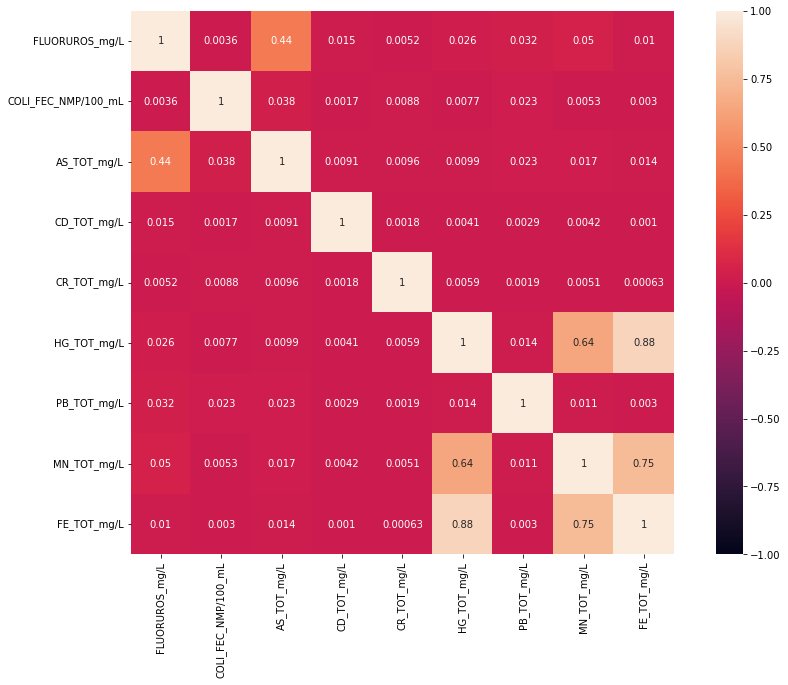

In [18]:
# Pintamos el mapa de calor con la matriz en base a la media

import matplotlib.pyplot as plt 

corr = df_aguasub_mean.corr().abs()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corr, vmax = 1, vmin = -1, square = True, annot = True)

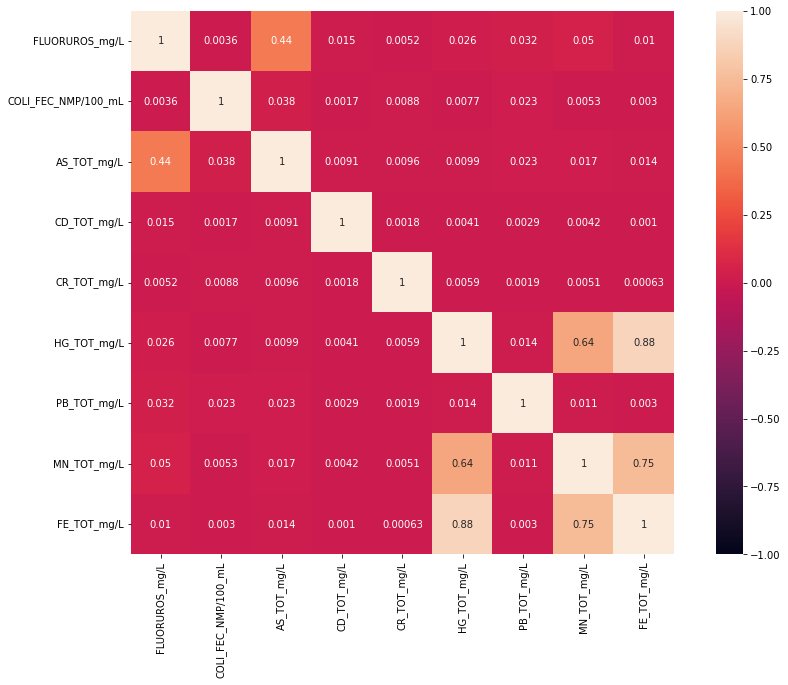

In [19]:
# Pintamos el mapa de calor con la matriz en base a la mediana

import matplotlib.pyplot as plt 

corr = df_aguasub_median.corr().abs()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corr, vmax = 1, vmin = -1, square = True, annot = True)

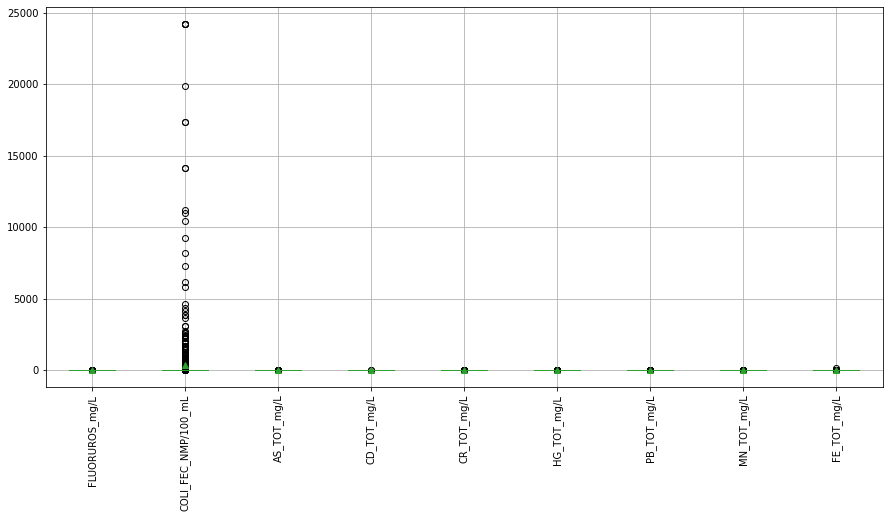

In [20]:
# Mostramos los outliers en base a la media

outliers = df_aguasub_mean.boxplot(figsize = (15,7),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

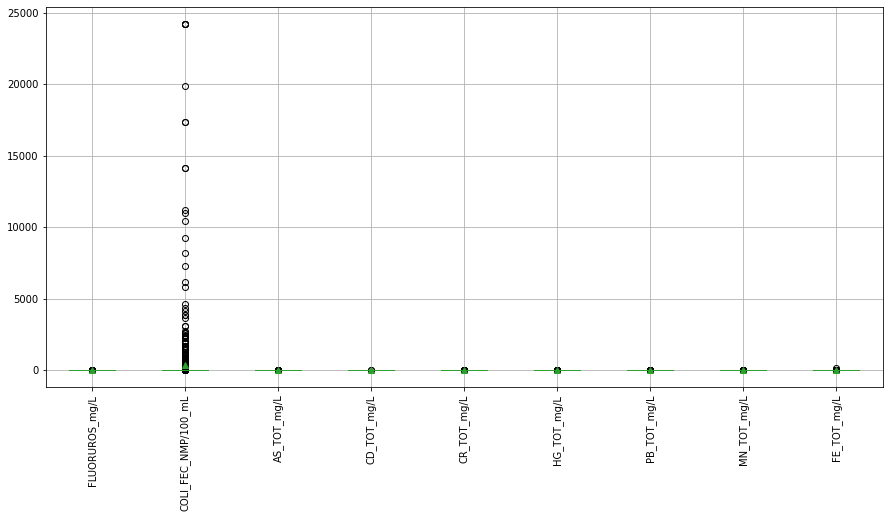

In [21]:
# Mostramos los outliers en base a la mediana

outliers = df_aguasub_median.boxplot(figsize = (15,7),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

In [22]:
# Analizamos la calidad del agua con su localización geográfica, nos valemos de las columnas SEMAFORO, LATITUD y LONGITUD

from shapely.geometry import Point

#creamos un dataframe con las coordenadas de las aguas subterraneas
df_coordenada = df_aguasub[['LONGITUD','LATITUD']]
#creamos el punto geograficos
df_coordenada["COORDENADA"] = list(zip(df_coordenada.LONGITUD, df_coordenada.LATITUD))
df_coordenada["COORDENADA"] = df_coordenada["COORDENADA"].apply(Point)
#revisamos el df
df_coordenada

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,LONGITUD,LATITUD,COORDENADA
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.7828)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


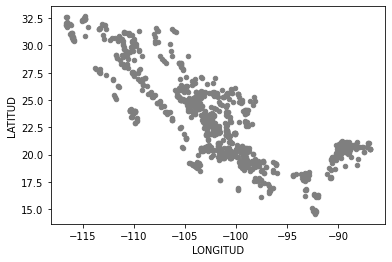

In [23]:
# Mostramos las coordenadas
from matplotlib.colors import Colormap
df_coordenada.plot.scatter('LONGITUD','LATITUD', c='#7f7f7f')

In [24]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 372 kB/s 
     |████████████████████████████████| 1.0 MB 35.0 MB/s 
     |████████████████████████████████| 1.7 MB 15.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 43.3 MB/s 
     |████████████████████████████████| 6.3 MB 38.6 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=2560d36690e53c6e3b9ff4ad4cd0a6801a00a1186302add75020783f6fc7ef41
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9f10b39ef74b5fe79552e09457002ccc05317510a532e127f52458e1c363a1a2
  Stored in directory: /root/.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

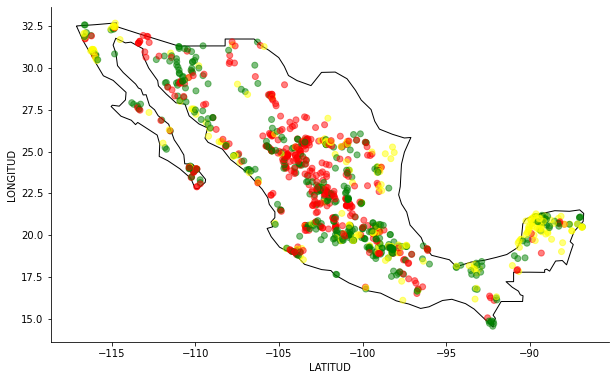

In [25]:
import geopandas as gpd

#agregamos una columna semaforo a las coordenadas con el semaforo del df original
df_coordenada['semaforo'] = df_aguasub['SEMAFORO']
#cambiamos los textos para que nos sirvan como colores al graficar
df_coordenada['semaforo'] = df_coordenada['semaforo'].replace('Verde','green')
df_coordenada['semaforo'] = df_coordenada['semaforo'].replace('Rojo','red')
df_coordenada['semaforo'] = df_coordenada['semaforo'].replace('Amarillo','yellow')

mapamexico = gpd.GeoDataFrame(df_coordenada, geometry="COORDENADA")
#codigo para sacar el mapa de mexico
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
#creamos la lista de colores para el mapa
color_puntos = df_coordenada['semaforo']
world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

#Graficamos el mapa con los colores de la lista
mapamexico.plot(ax=gax, color=color_puntos, alpha = 0.5)

#mapamexico

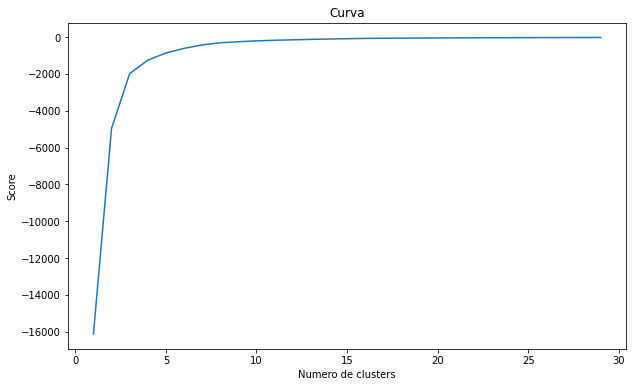

In [26]:

from sklearn.cluster import KMeans

#Cálculo de los kmeans
numero_de_clusters = range(1,30) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_clusters]
Y_axis = df_coordenada[['LATITUD']]
X_axis = df_coordenada[['LONGITUD']]
calulo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

plt.figure(figsize=(10,6))
plt.plot(numero_de_clusters, calulo_kmeans)
plt.xlabel('Numero de clusters')
plt.ylabel('Score')
plt.title('Curva')
plt.show()

In [29]:
# En base al score decidimos irnos por 7 clusters

X = df_coordenada[['LONGITUD', 'LATITUD']]
kmeans = KMeans(n_clusters=7).fit(X)
centroids = kmeans.cluster_centers_ #sacar centroides
clusters = kmeans.predict(X) #labels predecidos
# Getting the cluster centers
C = kmeans.cluster_centers_ #traigo valores de centroides

C_DF = pd.DataFrame(C) #convertirlo en DataFrame
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #lo convierte en lista 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #lo convierte en puntos para graficar

df_porcluster = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
#obtenemos el df de los kmeans con los 7 clusters
df_porcluster

,0,1,Coordinates
0,-115.206625,31.594992,POINT (-115.20662 31.59499)
1,-98.528634,19.153564,POINT (-98.52863 19.15356)
2,-103.558094,25.300941,POINT (-103.55809 25.30094)
3,-90.011576,19.679287,POINT (-90.01158 19.67929)
4,-101.788429,21.534997,POINT (-101.78843 21.53500)
5,-110.301764,29.373463,POINT (-110.30176 29.37346)
6,-109.072787,24.645844,POINT (-109.07279 24.64584)


In [30]:
# Renombramos los colores de la tabla resultante semaforo en inglés
y['SEMAFORO'] = y['SEMAFORO'].replace('Verde','green')
y['SEMAFORO'] = y['SEMAFORO'].replace('Rojo','red')
y['SEMAFORO'] = y['SEMAFORO'].replace('Amarillo','yellow')

#agregamos el numero de clusters al df de los puntos
df_coordenada['cluster'] = clusters



# Sacamos la moda agrupada por cluster para pintar el cluster y creamos un nuevo
# df en donde tengamos el cluster y su color de moda
df_clusterscolor = df_coordenada.groupby(['cluster'])['semaforo'].agg(pd.Series.mode).to_frame()
# le agregamos la columna semaforo y numero de cluster a al df
df_porcluster['semaforo2'] = df_clusterscolor['semaforo']
df_porcluster['cluster'] = df_porcluster.reset_index().index

# hacemos un join para agregar una columna al df de los puntos para 
# que se tenga el golor agrupado por cluster por cada punto en una columna nueva
# 'semaforoagrupado'
df_coordenada['semaforoagrupado'] =df_coordenada.join(df_porcluster.set_index('cluster'), on='cluster')['semaforo2']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


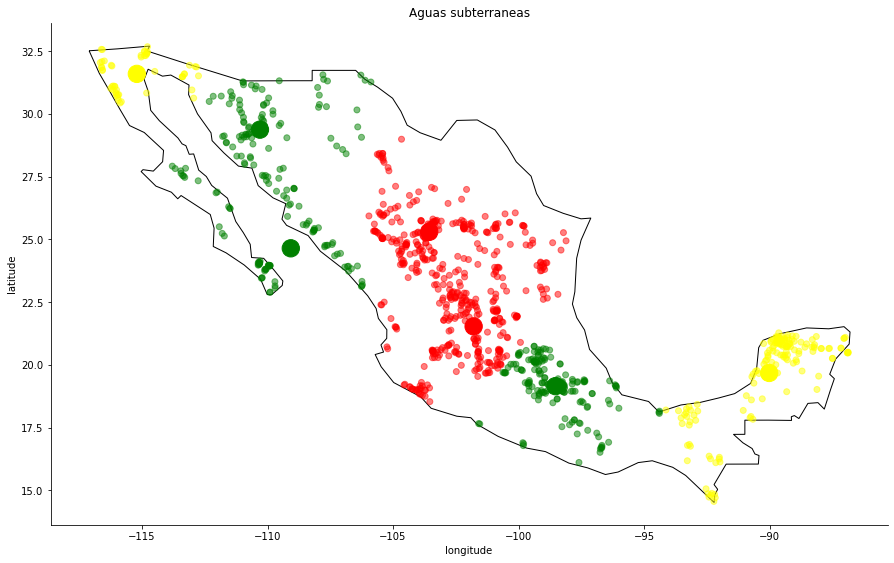

In [31]:

mapamexico = gpd.GeoDataFrame(df_coordenada, geometry="COORDENADA")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()

fig, gax = plt.subplots(figsize=(15,10))

# generamos colores de los puntos en base a la nueva columna de colores agrupados
color_puntos = df_coordenada['semaforoagrupado']
# generamos lista de colores de clusters
color_clusters = df_porcluster['semaforo2']

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais
#agregamso los puntos y los clusters con sus colores
mapamexico.plot(ax=gax, color=color_puntos, alpha = 0.5) 
df_porcluster.plot(ax=gax, color=color_clusters, alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas subterraneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()